### Importing libraries

In [257]:
# Importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Importing the Dataset

In [258]:
# Importing the data set

df_lifeexp = pd.read_csv("Life expectancy data.csv")
df_lifeexp.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Descriptive statistics before cleaning the data

In [259]:
df_lifeexp.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Exploratory Data Analysis - Outlier detection and handling

#### Life expectancy

In [260]:
df_lifeexp['Life expectancy '].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

Before


<AxesSubplot:xlabel='Life expectancy '>

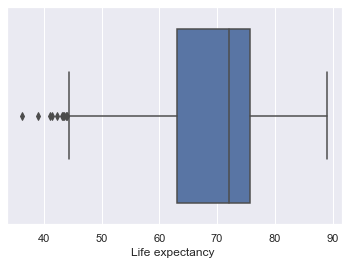

In [261]:
print("Before")
sns.boxplot(x=df_lifeexp['Life expectancy '])

In [262]:
#Life expectancy
lower_lim_le = df_lifeexp['Life expectancy '].quantile(0.25) - 1.5*(df_lifeexp['Life expectancy '].quantile(0.75) - df_lifeexp['Life expectancy '].quantile(0.25))
upper_lim_le = df_lifeexp['Life expectancy '].quantile(0.75) + 1.5*(df_lifeexp['Life expectancy '].quantile(0.75) - df_lifeexp['Life expectancy '].quantile(0.25))

In [263]:
df_lifeexp['Life expectancy '] = df_lifeexp['Life expectancy '].mask(df_lifeexp['Life expectancy '] < lower_lim_le)

After


<AxesSubplot:xlabel='Life expectancy '>

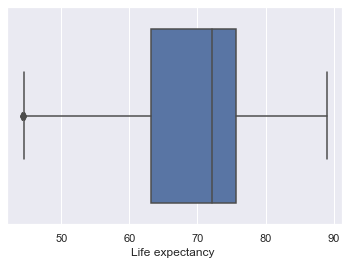

In [264]:
print("After")
sns.boxplot(x=df_lifeexp['Life expectancy '])

In [265]:
df_lifeexp['Life expectancy '].describe()

count    2918.000000
mean       69.318986
std         9.402404
min        44.300000
25%        63.225000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

#### Hepatitis B

Before


<AxesSubplot:xlabel='Hepatitis B'>

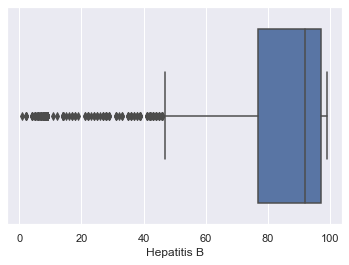

In [266]:
print("Before")
sns.boxplot(x=df_lifeexp['Hepatitis B'])

In [267]:
df_lifeexp['Hepatitis B'].describe()

count    2385.000000
mean       80.940461
std        25.070016
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis B, dtype: float64

In [268]:
#'Hepatitis B'
lower_lim_hb = df_lifeexp['Hepatitis B'].quantile(0.25) - 1.5*(df_lifeexp['Hepatitis B'].quantile(0.75) - df_lifeexp['Hepatitis B'].quantile(0.25))
upper_lim_hb = df_lifeexp['Hepatitis B'].quantile(0.75) + 1.5*(df_lifeexp['Hepatitis B'].quantile(0.75) - df_lifeexp['Hepatitis B'].quantile(0.25))

In [269]:
df_lifeexp['Hepatitis B'] = df_lifeexp['Hepatitis B'].mask(df_lifeexp['Hepatitis B'] < lower_lim_hb)

After


<AxesSubplot:xlabel='Hepatitis B'>

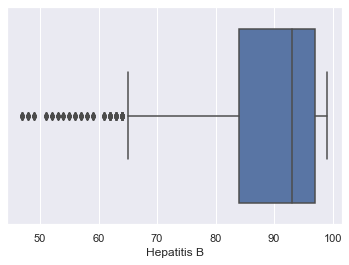

In [270]:
print("After")
sns.boxplot(x=df_lifeexp['Hepatitis B'])

In [271]:
df_lifeexp['Hepatitis B'].describe()

count    2131.000000
mean       88.558423
std        11.628027
min        47.000000
25%        84.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Hepatitis B, dtype: float64

#### Polio

Before


<AxesSubplot:xlabel='Polio'>

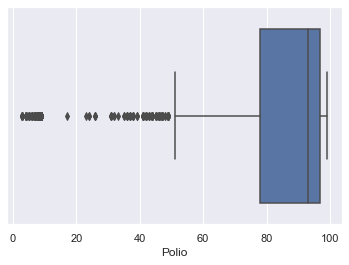

In [272]:
print("Before")
sns.boxplot(x=df_lifeexp['Polio'])

In [273]:
df_lifeexp['Polio'].describe()

count    2919.000000
mean       82.550188
std        23.428046
min         3.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Polio, dtype: float64

In [274]:
#'Polio'
lower_lim_polio = df_lifeexp['Polio'].quantile(0.25) - 1.5*(df_lifeexp['Polio'].quantile(0.75) - df_lifeexp['Polio'].quantile(0.25))
upper_lim_polio = df_lifeexp['Polio'].quantile(0.75) + 1.5*(df_lifeexp['Polio'].quantile(0.75) - df_lifeexp['Polio'].quantile(0.25))

In [275]:
df_lifeexp['Polio'] = df_lifeexp['Polio'].mask(df_lifeexp['Polio'] < lower_lim_polio)

After


<AxesSubplot:xlabel='Polio'>

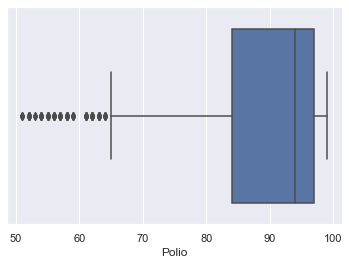

In [276]:
print("After")
sns.boxplot(x=df_lifeexp['Polio'])

In [277]:
df_lifeexp['Polio'].describe()

count    2640.000000
mean       89.090909
std        11.308050
min        51.000000
25%        84.000000
50%        94.000000
75%        97.000000
max        99.000000
Name: Polio, dtype: float64

#### Total Expenditure

Before


<AxesSubplot:xlabel='Total expenditure'>

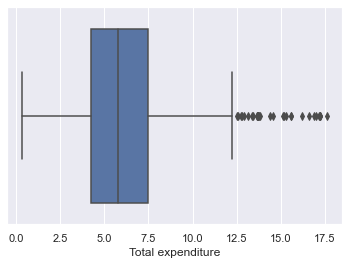

In [278]:
print("Before")
sns.boxplot(x=df_lifeexp['Total expenditure'])

In [279]:
df_lifeexp['Total expenditure'].describe()

count    2712.00000
mean        5.93819
std         2.49832
min         0.37000
25%         4.26000
50%         5.75500
75%         7.49250
max        17.60000
Name: Total expenditure, dtype: float64

In [280]:
#Total expenditure'
lower_lim_te = df_lifeexp['Total expenditure'].quantile(0.25) - 1.5*(df_lifeexp['Total expenditure'].quantile(0.75) - df_lifeexp['Total expenditure'].quantile(0.25))
upper_lim_te = df_lifeexp['Total expenditure'].quantile(0.75) + 1.5*(df_lifeexp['Total expenditure'].quantile(0.75) - df_lifeexp['Total expenditure'].quantile(0.25))

In [281]:
df_lifeexp['Total expenditure'] = df_lifeexp['Total expenditure'].mask(df_lifeexp['Total expenditure'] > upper_lim_te)

After


<AxesSubplot:xlabel='Total expenditure'>

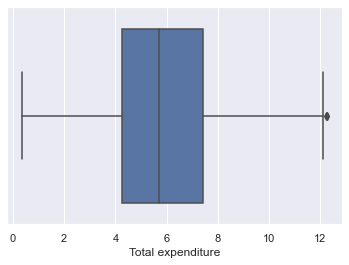

In [282]:
print("After")
sns.boxplot(x=df_lifeexp['Total expenditure'])

In [283]:
df_lifeexp['Total expenditure'].describe()

count    2680.000000
mean        5.832951
std         2.312034
min         0.370000
25%         4.250000
50%         5.710000
75%         7.430000
max        12.250000
Name: Total expenditure, dtype: float64

#### GDP

Before


<AxesSubplot:xlabel='GDP'>

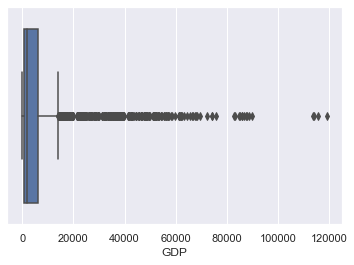

In [284]:
print("Before")
sns.boxplot(x=df_lifeexp['GDP'])

In [285]:
df_lifeexp['GDP'].describe()

count      2490.000000
mean       7483.158469
std       14270.169342
min           1.681350
25%         463.935626
50%        1766.947595
75%        5910.806335
max      119172.741800
Name: GDP, dtype: float64

In [286]:
#'GDP'
lower_lim_gdp = df_lifeexp['GDP'].quantile(0.25) - 1.5*(df_lifeexp['GDP'].quantile(0.75) - df_lifeexp['GDP'].quantile(0.25))
upper_lim_gdp = df_lifeexp['GDP'].quantile(0.75) + 1.5*(df_lifeexp['GDP'].quantile(0.75) - df_lifeexp['GDP'].quantile(0.25))

In [287]:
df_lifeexp['GDP'] = df_lifeexp['GDP'].mask(df_lifeexp['GDP'] > upper_lim_gdp)

After


<AxesSubplot:xlabel='GDP'>

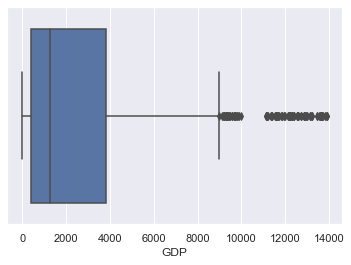

In [288]:
print("After")
sns.boxplot(x=df_lifeexp['GDP'])

In [289]:
df_lifeexp['GDP'].describe()

count     2125.000000
mean      2537.836280
std       3035.258436
min          1.681350
25%        387.753211
50%       1253.657431
75%       3827.786267
max      13893.187680
Name: GDP, dtype: float64

#### Population

Before


<AxesSubplot:xlabel='Population'>

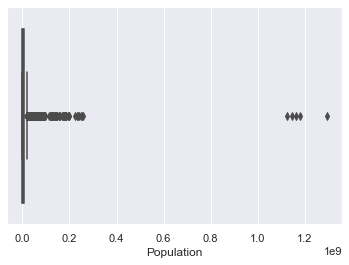

In [290]:
print("Before")
sns.boxplot(x=df_lifeexp['Population'])

In [291]:
df_lifeexp['Population'].describe()

count    2.286000e+03
mean     1.275338e+07
std      6.101210e+07
min      3.400000e+01
25%      1.957932e+05
50%      1.386542e+06
75%      7.420359e+06
max      1.293859e+09
Name: Population, dtype: float64

In [292]:
#'Population'
lower_lim_pop = df_lifeexp['Population'].quantile(0.25) - 1.5*(df_lifeexp['Population'].quantile(0.75) - df_lifeexp['Population'].quantile(0.25))
upper_lim_pop = df_lifeexp['Population'].quantile(0.75) + 1.5*(df_lifeexp['Population'].quantile(0.75) - df_lifeexp['Population'].quantile(0.25))

In [293]:
df_lifeexp['Population'] = df_lifeexp['Population'].mask(df_lifeexp['Population'] > upper_lim_pop)

After


<AxesSubplot:xlabel='Population'>

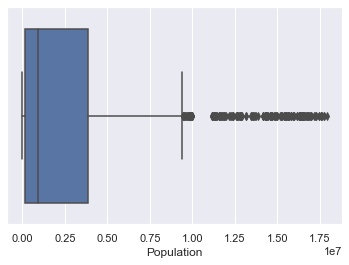

In [294]:
print("After")
sns.boxplot(x=df_lifeexp['Population'])

In [295]:
df_lifeexp['Population'].describe()

count    1.992000e+03
mean     2.915384e+06
std      4.209360e+06
min      3.400000e+01
25%      1.384468e+05
50%      8.923400e+05
75%      3.859758e+06
max      1.789956e+07
Name: Population, dtype: float64

#### Schooling

Before


<AxesSubplot:xlabel='Schooling'>

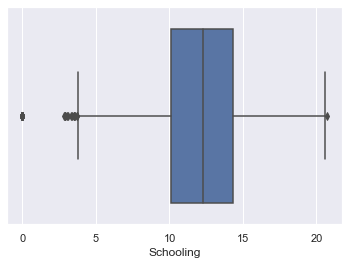

In [296]:
print("Before")
sns.boxplot(x=df_lifeexp['Schooling'])

In [297]:
df_lifeexp['Schooling'].describe()

count    2775.000000
mean       11.992793
std         3.358920
min         0.000000
25%        10.100000
50%        12.300000
75%        14.300000
max        20.700000
Name: Schooling, dtype: float64

In [298]:
#'Schooling'
lower_lim_sch = df_lifeexp['Schooling'].quantile(0.25) - 1.5*(df_lifeexp['Schooling'].quantile(0.75) - df_lifeexp['Schooling'].quantile(0.25))
upper_lim_sch = df_lifeexp['Schooling'].quantile(0.75) + 1.5*(df_lifeexp['Schooling'].quantile(0.75) - df_lifeexp['Schooling'].quantile(0.25))

In [299]:
df_lifeexp["Schooling"] = df_lifeexp["Schooling"].mask(df_lifeexp["Schooling"] < lower_lim_sch)

After


<AxesSubplot:xlabel='Schooling'>

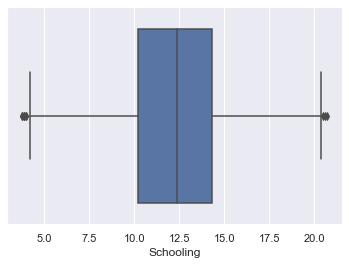

In [300]:
print("After")
sns.boxplot(x=df_lifeexp['Schooling'])

In [301]:
df_lifeexp['Schooling'].describe()

count    2732.000000
mean       12.163726
std         3.087951
min         3.800000
25%        10.200000
50%        12.400000
75%        14.300000
max        20.700000
Name: Schooling, dtype: float64

#### Adult mortality

Before


<AxesSubplot:xlabel='Adult Mortality'>

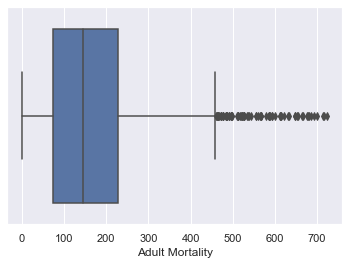

In [302]:
print("Before")
sns.boxplot(x=df_lifeexp['Adult Mortality'])

In [303]:
#'Adult Mortality'
lower_lim_sch = df_lifeexp['Adult Mortality'].quantile(0.25) - 1.5*(df_lifeexp['Adult Mortality'].quantile(0.75) - df_lifeexp['Adult Mortality'].quantile(0.25))
upper_lim_sch = df_lifeexp['Adult Mortality'].quantile(0.75) + 1.5*(df_lifeexp['Adult Mortality'].quantile(0.75) - df_lifeexp['Adult Mortality'].quantile(0.25))

In [304]:
df_lifeexp["Adult Mortality"] = df_lifeexp["Adult Mortality"].mask(df_lifeexp["Adult Mortality"] > upper_lim_sch)

After


<AxesSubplot:xlabel='Adult Mortality'>

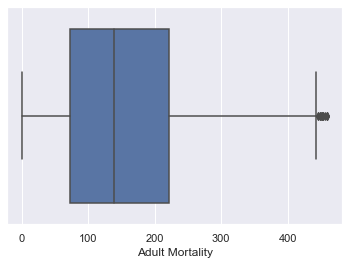

In [305]:
print("After")
sns.boxplot(x=df_lifeexp['Adult Mortality'])

#### Alcohol

Before


<AxesSubplot:xlabel='Alcohol'>

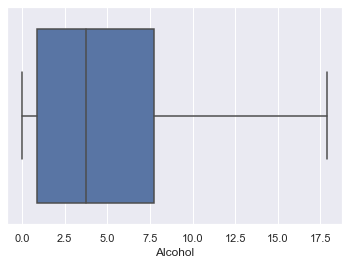

In [306]:
print("Before")
sns.boxplot(x=df_lifeexp['Alcohol'])

In [307]:
#'Adult Mortality'
lower_lim_sch = df_lifeexp['Alcohol'].quantile(0.25) - 1.5*(df_lifeexp['Alcohol'].quantile(0.75) - df_lifeexp['Alcohol'].quantile(0.25))
upper_lim_sch = df_lifeexp['Alcohol'].quantile(0.75) + 1.5*(df_lifeexp['Alcohol'].quantile(0.75) - df_lifeexp['Alcohol'].quantile(0.25))

In [308]:
df_lifeexp["Alcohol"] = df_lifeexp["Alcohol"].mask(df_lifeexp["Alcohol"] > upper_lim_sch)

After


<AxesSubplot:xlabel='Alcohol'>

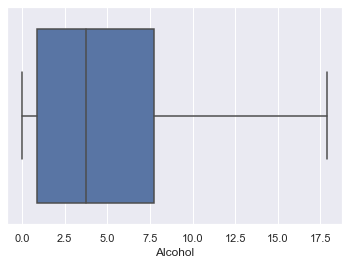

In [309]:
print("After")
sns.boxplot(x=df_lifeexp['Alcohol'])

#### Measles

Before


<AxesSubplot:xlabel='Measles '>

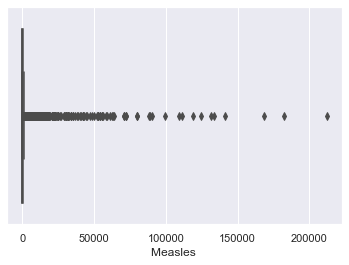

In [310]:
print("Before")
sns.boxplot(x=df_lifeexp['Measles '])

In [311]:
lower_lim_sch = df_lifeexp['Measles '].quantile(0.25) - 1.5*(df_lifeexp['Measles '].quantile(0.75) - df_lifeexp['Measles '].quantile(0.25))
upper_lim_sch = df_lifeexp['Measles '].quantile(0.75) + 1.5*(df_lifeexp['Measles '].quantile(0.75) - df_lifeexp['Measles '].quantile(0.25))

In [312]:
df_lifeexp["Measles "] = df_lifeexp["Measles "].mask(df_lifeexp["Measles "] > upper_lim_sch)

After


<AxesSubplot:xlabel='Measles '>

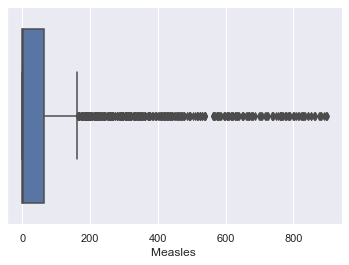

In [313]:
print("After")
sns.boxplot(x=df_lifeexp['Measles '])

In [314]:
print(f"We have masked the outliers only for the features that are being considered in the model")
print(f"Variables in our analysis are: 1. Life expectancy, 2. Alcohol, 3. Income composition of \
resources, 4. Schooling, 5.Development Status")

We have masked the outliers only for the features that are being considered in the model
Variables in our analysis are: 1. Life expectancy, 2. Alcohol, 3. Income composition of resources, 4. Schooling, 5.Development Status


### Exploratory Data Analysis - Missing value handling

In [315]:
print("The number of missing values in each of the columns before handling")
df_lifeexp.isnull().sum()

The number of missing values in each of the columns before handling


Country                              0
Year                                 0
Status                               0
Life expectancy                     20
Adult Mortality                     92
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        807
Measles                            542
 BMI                                34
under-five deaths                    0
Polio                              298
Total expenditure                  258
Diphtheria                          19
 HIV/AIDS                            0
GDP                                813
Population                         946
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          206
dtype: int64

In [316]:
# Handle missing values

# Replacing the NaN values with median of that particular column

df_lifeexp_new = df_lifeexp
df_lifeexp["Life expectancy "] = df_lifeexp["Life expectancy "].fillna(df_lifeexp["Life expectancy "].median())
df_lifeexp["Schooling"] = df_lifeexp["Schooling"].fillna(df_lifeexp["Schooling"].median())
df_lifeexp["Population"] = df_lifeexp["Population"].fillna(df_lifeexp["Population"].median())
df_lifeexp["Adult Mortality"] = df_lifeexp["Adult Mortality"].fillna(df_lifeexp["Adult Mortality"].median())
df_lifeexp["Alcohol"] = df_lifeexp["Alcohol"].fillna(df_lifeexp["Alcohol"].median())
df_lifeexp[" HIV/AIDS"] = df_lifeexp[" HIV/AIDS"].fillna(df_lifeexp[" HIV/AIDS"].median())
df_lifeexp["Measles "] = df_lifeexp["Measles "].fillna(df_lifeexp["Measles "].median())
df_lifeexp["Hepatitis B"] = df_lifeexp["Hepatitis B"].fillna(df_lifeexp["Hepatitis B"].median())
df_lifeexp[" BMI "] = df_lifeexp[" BMI "].fillna(df_lifeexp[" BMI "].median())
df_lifeexp["Polio"] = df_lifeexp["Polio"].fillna(df_lifeexp["Polio"].median())
df_lifeexp["Total expenditure"] = df_lifeexp["Total expenditure"].fillna(df_lifeexp["Total expenditure"].median())
df_lifeexp["Diphtheria "] = df_lifeexp["Diphtheria "].fillna(df_lifeexp["Diphtheria "].median())
df_lifeexp["GDP"] = df_lifeexp["GDP"].fillna(df_lifeexp["GDP"].median())
df_lifeexp[" thinness  1-19 years"] = df_lifeexp[" thinness  1-19 years"].fillna(df_lifeexp[" thinness  1-19 years"].median())
df_lifeexp[" thinness 5-9 years"] = df_lifeexp[" thinness 5-9 years"].fillna(df_lifeexp[" thinness 5-9 years"].median())
df_lifeexp["Income composition of resources"] = df_lifeexp["Income composition of resources"].fillna(df_lifeexp["Income composition of resources"].median())
df_lifeexp_new = df_lifeexp_new[df_lifeexp_new["Income composition of resources"]!=0.0]

In [317]:
df_lifeexp.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [318]:
df_lifeexp.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.337917,153.077604,30.303948,4.546875,738.251295,89.778421,68.152485,38.381178,42.035739,89.588836,5.822155,82.393125,1.742103,2182.479777,2.263989e+06,4.821886,4.852144,0.630362,12.180293
std,4.613841,9.373126,104.180408,117.926501,3.921946,1987.914858,10.099046,159.267133,19.935375,160.445548,10.821033,2.208424,23.655562,5.077785,2644.380351,3.592402e+06,4.397621,4.485854,0.205140,2.978300
min,2000.000000,44.300000,1.000000,0.000000,0.010000,0.000000,47.000000,0.000000,1.000000,0.000000,51.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,3.800000
25%,2004.000000,63.300000,74.000000,0.000000,1.092500,4.685343,88.000000,0.000000,19.400000,0.000000,86.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.400000
50%,2008.000000,72.100000,139.000000,3.000000,3.755000,64.912906,93.000000,3.000000,43.500000,4.000000,94.000000,5.710000,93.000000,0.100000,1253.657431,8.923400e+05,3.300000,3.300000,0.677000,12.400000
75%,2012.000000,75.600000,218.000000,22.000000,7.390000,441.534144,96.000000,36.000000,56.100000,28.000000,97.000000,7.210000,97.000000,0.800000,2578.751476,1.882107e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,459.000000,1800.000000,17.870000,19479.911610,99.000000,899.000000,87.300000,2500.000000,99.000000,12.250000,99.000000,50.600000,13893.187680,1.789956e+07,27.700000,28.600000,0.948000,20.700000


In [319]:
df_lifeexp.to_csv("Cleaned_WHO_Data.csv")
df_new = df_lifeexp[["Life expectancy ","Schooling","Alcohol",
                       "Income composition of resources","Year","Hepatitis B","Population"]] # For our analysis

### Checking for correlation

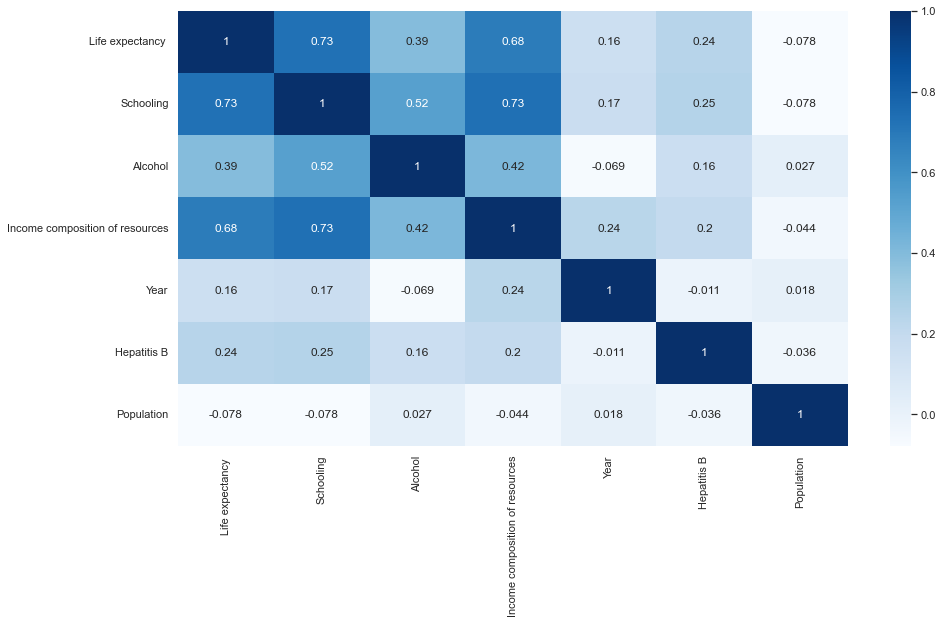

In [320]:
plt.figure(figsize=(15,8))
sns.heatmap(df_new.corr(),annot=True,cmap='Blues')
plt.show()

### Distribution of our vairables after data-preprocessing

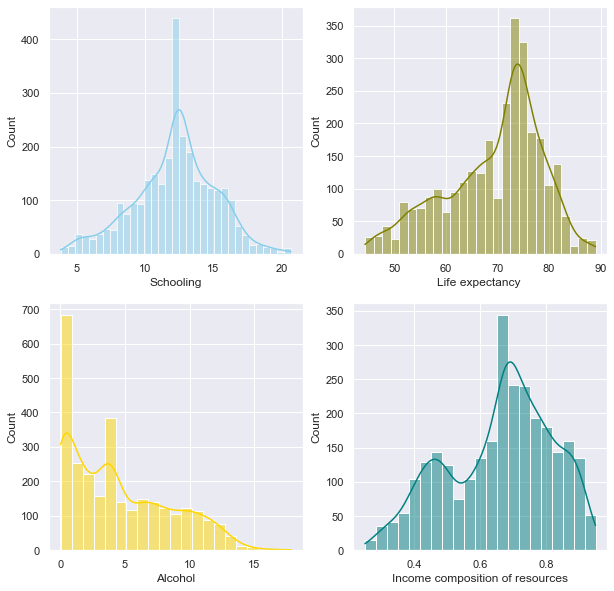

In [321]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=df_lifeexp, x="Schooling", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_lifeexp, x="Life expectancy ", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_lifeexp, x="Alcohol", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_lifeexp_new, x="Income composition of resources", kde=True, color="teal", ax=axs[1, 1])

plt.show()

#### Relationship between schooling and life expectancy

In [322]:
# Assessing the relationship between schooling and life expectancy

# Dependent variable
y = df_lifeexp.loc[:,"Life expectancy "].values

# Independent variable
len_x = df_lifeexp.shape[0]
x = df_lifeexp.loc[:,"Schooling"].values.reshape(len_x, 1)

# Building regression model

lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [323]:
life_pred_sc = lm.predict(x)

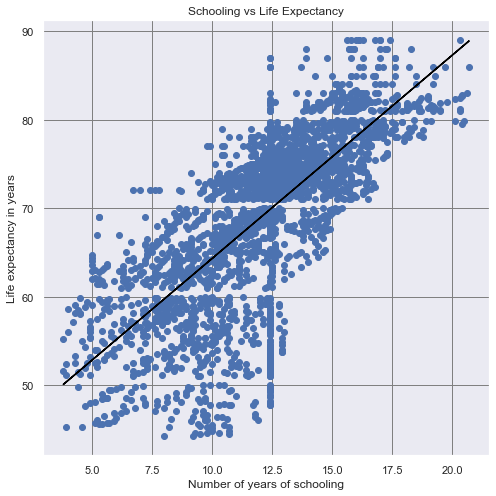

In [324]:
###########################
# FOR PPT - 1

plt.figure(figsize=(8,8))
plt.scatter(x, y)
plt.plot(x,life_pred_sc, color="black")
plt.xlabel("Number of years of schooling")
plt.ylabel("Life expectancy in years")
plt.title("Schooling vs Life Expectancy")
plt.grid(color = "grey",linewidth=1)

In [325]:
x_income = df_lifeexp.loc[:,["Income composition of resources"]].values.reshape(len(x),1)
x_new_income = df_lifeexp_new.loc[:,["Income composition of resources"]].values.reshape(len(df_lifeexp_new),1)
y_inc = df_lifeexp_new.loc[:,"Life expectancy "].values
x_alcohol = df_lifeexp.loc[:,["Alcohol"]].values.reshape(len(x),1)

#### Adding income composition, alcohol to the linear model

In [326]:
# For income vs Life expectancy
lr_income = LinearRegression()
lr_income.fit(x_new_income, y_inc)
life_pred_income = lr_income.predict(x_new_income)

# For alcohol vs life expectancy
lr_alcohol = LinearRegression()
lr_alcohol.fit(x_alcohol, y)
life_pred_alcohol = lr_alcohol.predict(x_alcohol)

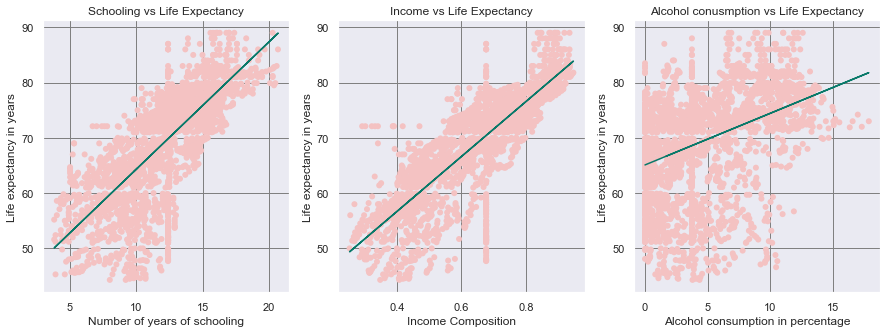

In [327]:
# Plot the graph when these two factors (Income and schooling) affect schooling

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(x, y,facecolors='#f4c2c2', edgecolors='none' )
plt.plot(x,life_pred_sc, color="#097969")
plt.xlabel("Number of years of schooling")
plt.ylabel("Life expectancy in years")
plt.title("Schooling vs Life Expectancy")
plt.grid(color = "grey",linewidth=1)

plt.subplot(1,3,2)
plt.scatter(x_new_income, y_inc,facecolors='#f4c2c2', edgecolors='none' )
plt.plot(x_new_income,life_pred_income, color="#097969")
plt.xlabel("Income Composition")
plt.ylabel("Life expectancy in years")
plt.title("Income vs Life Expectancy")
plt.grid(color = "grey",linewidth=1)

plt.subplot(1,3,3)
plt.scatter(x_alcohol, y,facecolors='#f4c2c2', edgecolors='none' )
plt.plot(x_alcohol,life_pred_alcohol, color="#097969")
plt.xlabel("Alcohol consumption in percentage")
plt.ylabel("Life expectancy in years")
plt.title("Alcohol conusmption vs Life Expectancy")
plt.grid(color = "grey",linewidth=1)

### Modelling and Regression analysis

<AxesSubplot:xlabel='Income composition of resources'>

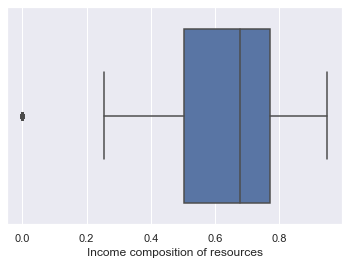

In [328]:
sns.boxplot(x=df_lifeexp['Income composition of resources'])

#### Insight-1

In [329]:
# OLS Regression results: to find the p-value, and constants

x_const = sm.add_constant(x) # Adding intercept
est = sm.OLS(y, x_const)
estimate = est.fit()
#print(estimate.summary())
print(estimate.summary(xname=["Intercept","Schooling"]))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     3357.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:18:00   Log-Likelihood:                -9623.2
No. Observations:                2938   AIC:                         1.925e+04
Df Residuals:                    2936   BIC:                         1.926e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.3403      0.497     83.104      0.0

Life expectancy is highly affected by schooling  with a p-value of < 0.05
Therefore, every 1-year increase in schooling increases life    expectancy by 2.3 years

#### Insight-2

In [330]:
# For income vs Life expectancy
lr_income = LinearRegression()
lr_income.fit(x_income, y)
life_pred_income = lr_income.predict(x_income)

# For alcohol vs life expectancy
lr_alcohol = LinearRegression()
lr_alcohol.fit(x_alcohol, y)
life_pred_alcohol = lr_alcohol.predict(x_alcohol)

In [331]:
# Testing the significance of schooling on life expectancy in developed and undeveloped countries

In [332]:
df_lifeexp_final = pd.get_dummies(df_lifeexp, columns=["Status"])
df_lifeexp_final.drop("Status_Developing", inplace=True, axis=1)
df_lifeexp_final["Schooling:Developed"] = df_lifeexp_final["Schooling"]*df_lifeexp_final["Status_Developed"]
x_categorical = df_lifeexp_final.loc[:,["Schooling","Status_Developed","Schooling:Developed"]].values
# 2426 Developing countries and 512 Developed Countries, 1- Developed, 0-developing

In [333]:
x_const_categorical = sm.add_constant(x_categorical) # Adding intercept
est = sm.OLS(y, x_const_categorical)
estimate = est.fit()
# #print(estimate.summary())
print(estimate.summary(xname=["Intercept","Schooling","Status_Developed", "Schooling:Developed"]))
# R2 is very low (0.185) which means there does not exist strong linear relationship between GDP and Life expectancy

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     1266.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:18:01   Log-Likelihood:                -9523.0
No. Observations:                2938   AIC:                         1.905e+04
Df Residuals:                    2934   BIC:                         1.908e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              41.8293    

---> From the above analysis, we can understand that:

y = 41.8293  + 2.2159*Schooling + 26.1695*Developed -1.4945*Schooling*Developed

Developing: The average LE in a developing country is 41.8 years, and with 1 year increase in schooling the LE increases by 2.2 years <br>
Developed: The average LE in a developed country is 68 years, and with 1 year increase in schooling the LE increases by 0.7 years <br>

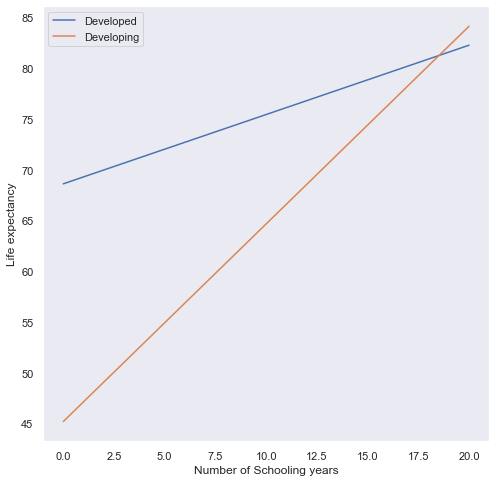

In [334]:
#####################
### FOR PPT - 2
# Graph

Schooling = np.linspace(0,20,100)
l_exp_undev = 45.197 + 1.9477*Schooling # Developing
l_exp_dev = 68.619 + 0.683*Schooling # Developed
plt.figure(figsize=(8,8))
plt.plot(Schooling, l_exp_dev, label="Developed")
plt.plot(Schooling, l_exp_undev, label="Developing")
plt.xlabel("Number of Schooling years")
plt.ylabel("Life expectancy")
plt.legend()
plt.grid()

From the above graph (WHO data) we can deduce that:
1. The rate at which the life expectancy increases w.r.t schooling is slower in developed countries than developing.
2. People in developing countries have to mandatorily take schooling in order to live longer
3. People in developed countries do not need to do schooling mandatorily to bring their life expectancy longer, there may be other factors that are driving them to live longer as we can see that people with no schooling live up to > 60 years, but for a person in developing country, he needs to do 10 years of schooling to bring his lifeline above 60 years
4. A person who does 8 years of schooling in developed country live 14 years longer than a person who does same years of schooling in undeveloped countries.

Hence we can deduce, that:
Schooling has a major impact on life expectancy for developing countries than developed

#2

-> The average life expectancy in a developed country w/o education is higher than that of a developing country w/o education. <br>
-> However, we see a greater influence of education in a developing country as opposed  to a developed country. <br>
-> Reason being, chances of accessing most of new age amenities increases with education in developing countries, whereas, people already have access to better healthcare, better pharma, better standard of living by default in developed countries. <br>
-> A developing country is constantly educating themselves, making changes towards advancement and striving to make their amenities better, in turn offering a better chance at healthcare, hence we can expect better effect of schooling on LE in a developing country over a already developed country. <br>
-> We can expect the healthcare to be saturated in an already developed country.

#### Insight-3

In [335]:
df_lifeexp_final["Alcohol:Developed"] = df_lifeexp_final["Alcohol:Developed"] = df_lifeexp_final["Alcohol"]*df_lifeexp_final["Status_Developed"]
x_final = df_lifeexp_final.loc[:,["Schooling","Status_Developed","Alcohol","Income composition of resources","Schooling:Developed","Alcohol:Developed"]].values
x_const_final = sm.add_constant(x_final) # Adding intercept
est = sm.OLS(y, x_const_final)
estimate = est.fit()
# #print(estimate.summary())
print(estimate.summary(xname=["Intercept","Schooling","Status_Developed","Alcohol","Income composition of resources","Schooling:Developed","Alcohol:Developed"]))
# R2 is very low (0.185) which means there does not exist strong linear relationship between GDP and Life expectancy
# 2426 Developing countries and 512 Developed Countries, 1- Developed, 0-developing

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     749.9
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:18:01   Log-Likelihood:                -9376.6
No. Observations:                2938   AIC:                         1.877e+04
Df Residuals:                    2931   BIC:                         1.881e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

When controlling for country status, alcohol and income composition of a country, the effect of schooling on life expectancy is significant. Also, when controlled for income composition, country status, and alcohol consumption, for every unit increase in alcohol consumption, life expectancy decreases